# Analysis of Students' Academic Performance

## Introduction

This work aims to analyze a dataset on the academic performance of secondary school students. Through the application of data science techniques, we intend to identify patterns and factors that influence students' academic success, as well as develop predictive models to classify students in terms of passing or failing.

The dataset used contains information about demographic, socioeconomic, family, and behavioral characteristics of students, allowing for a comprehensive analysis of the factors that may influence their academic performance.

## Importing libraries and loading necessary data

We begin by importing the necessary libraries for data analysis, visualization, and modeling.

In [1]:
# Libraries for data manipulation
import pandas as pd
import numpy as np

# Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries for preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import OrdinalEncoder

# Libraries for modeling
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import *

# Visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

We will load the dataset and perform an initial exploration to understand its structure and characteristics.

In [2]:
# Loading the dataset
df = pd.read_csv("student-data.csv")

# Viewing the first rows of the dataset
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [3]:
# Checking the dimensions of the dataset
num_features = df.shape[1]
num_records = df.shape[0]

print(f'Number of columns (features): {num_features}')
print(f'Number of rows (records): {num_records}')

Number of columns (features): 31
Number of rows (records): 395


The dataset contains 31 columns (features) and 395 rows (records). Each row represents a student, and the columns represent different attributes related to the student, including demographic, family, academic, and behavioral information.

In [4]:
# Checking the data types of each column
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object

We can observe that the dataset contains a mix of numerical variables (type `int64`) and categorical variables (type `object`). The numerical variables include age, parents' education level, travel time, study time, failures, family relationships, free time, going out, alcohol consumption, health, and absences. The categorical variables include school, sex, address, family size, parents' marital status, parents' occupation, reason for choosing the school, guardian, school support, family support, paid classes, extracurricular activities, nursery attendance, desire for higher education, internet access, romantic relationship, and the target variable 'passed'.

In [5]:
# Checking for missing values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

The dataset does not have any null values, which simplifies the preprocessing process. All columns are complete.

## Detailed Data Characterization

We will perform a more detailed analysis of the dataset's characteristics, including descriptive statistics and variable distribution.

In [6]:
# Descriptive statistics for numerical variables
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [7]:
# Analysis of categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns

# Creating a dictionary to store the counts of each categorical variable
categorical_counts = {}

for column in categorical_columns:
    categorical_counts[column] = df[column].value_counts()
    
# Viewing the counts for each categorical variable
for column, counts in categorical_counts.items():
    print(f"\nDistribution of variable '{column}':\n")
    print(counts)
    print(f"Percentage:\n{counts / counts.sum() * 100}%")


Distribution of variable 'school':

school
GP    349
MS     46
Name: count, dtype: int64
Percentage:
school
GP    88.35443
MS    11.64557
Name: count, dtype: float64%

Distribution of variable 'sex':

sex
F    208
M    187
Name: count, dtype: int64
Percentage:
sex
F    52.658228
M    47.341772
Name: count, dtype: float64%

Distribution of variable 'address':

address
U    307
R     88
Name: count, dtype: int64
Percentage:
address
U    77.721519
R    22.278481
Name: count, dtype: float64%

Distribution of variable 'famsize':

famsize
GT3    281
LE3    114
Name: count, dtype: int64
Percentage:
famsize
GT3    71.139241
LE3    28.860759
Name: count, dtype: float64%

Distribution of variable 'Pstatus':

Pstatus
T    354
A     41
Name: count, dtype: int64
Percentage:
Pstatus
T    89.620253
A    10.379747
Name: count, dtype: float64%

Distribution of variable 'Mjob':

Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64
Percentage:
Mj

Distribution of the target variable 'passed':
passed
yes    265
no     130
Name: count, dtype: int64
Percentage:
passed
yes    67.088608
no     32.911392
Name: count, dtype: float64%


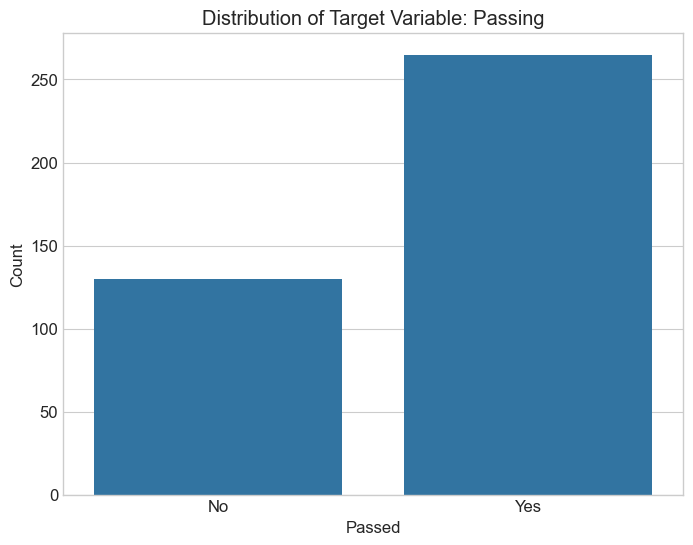

In [8]:
# Analysis of the target variable 'passed'
target_counts = df['passed'].value_counts()
print("Distribution of the target variable 'passed':")
print(target_counts)
print(f"Percentage:\n{target_counts / target_counts.sum() * 100}%")

# Visualization of the target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='passed', data=df)
plt.title('Distribution of Target Variable: Passing')
plt.xlabel('Passed')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

The analysis of the target variable 'passed' reveals that there is an imbalance in the class distribution. This imbalance can affect the performance of classification models, so it will be necessary to consider class balancing techniques during data preprocessing.

## Data Visualization

We will create visualizations to explore the relationships between variables and identify patterns in the data.

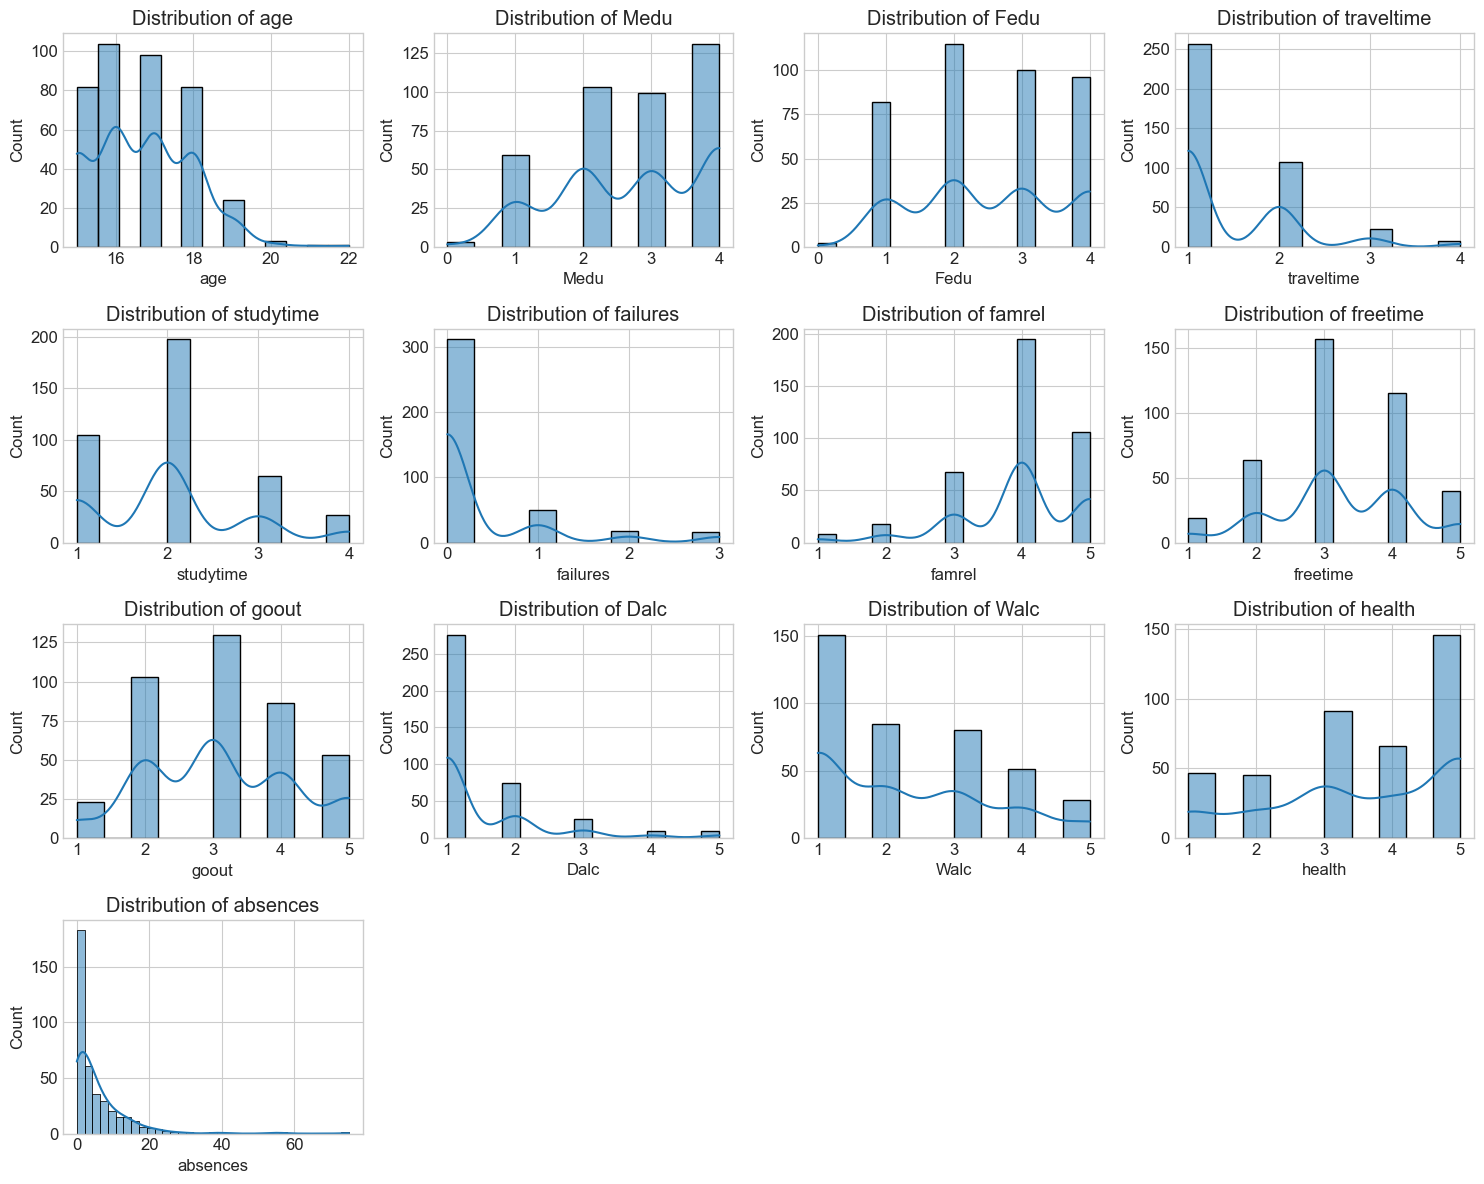

In [9]:
# Visualization of the distribution of numerical variables
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Creating histograms for numerical variables
plt.figure(figsize=(15, 12))
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
plt.show()

The histograms show the distribution of numerical variables. We can observe that some variables, such as 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', and 'absences', have asymmetric distributions.

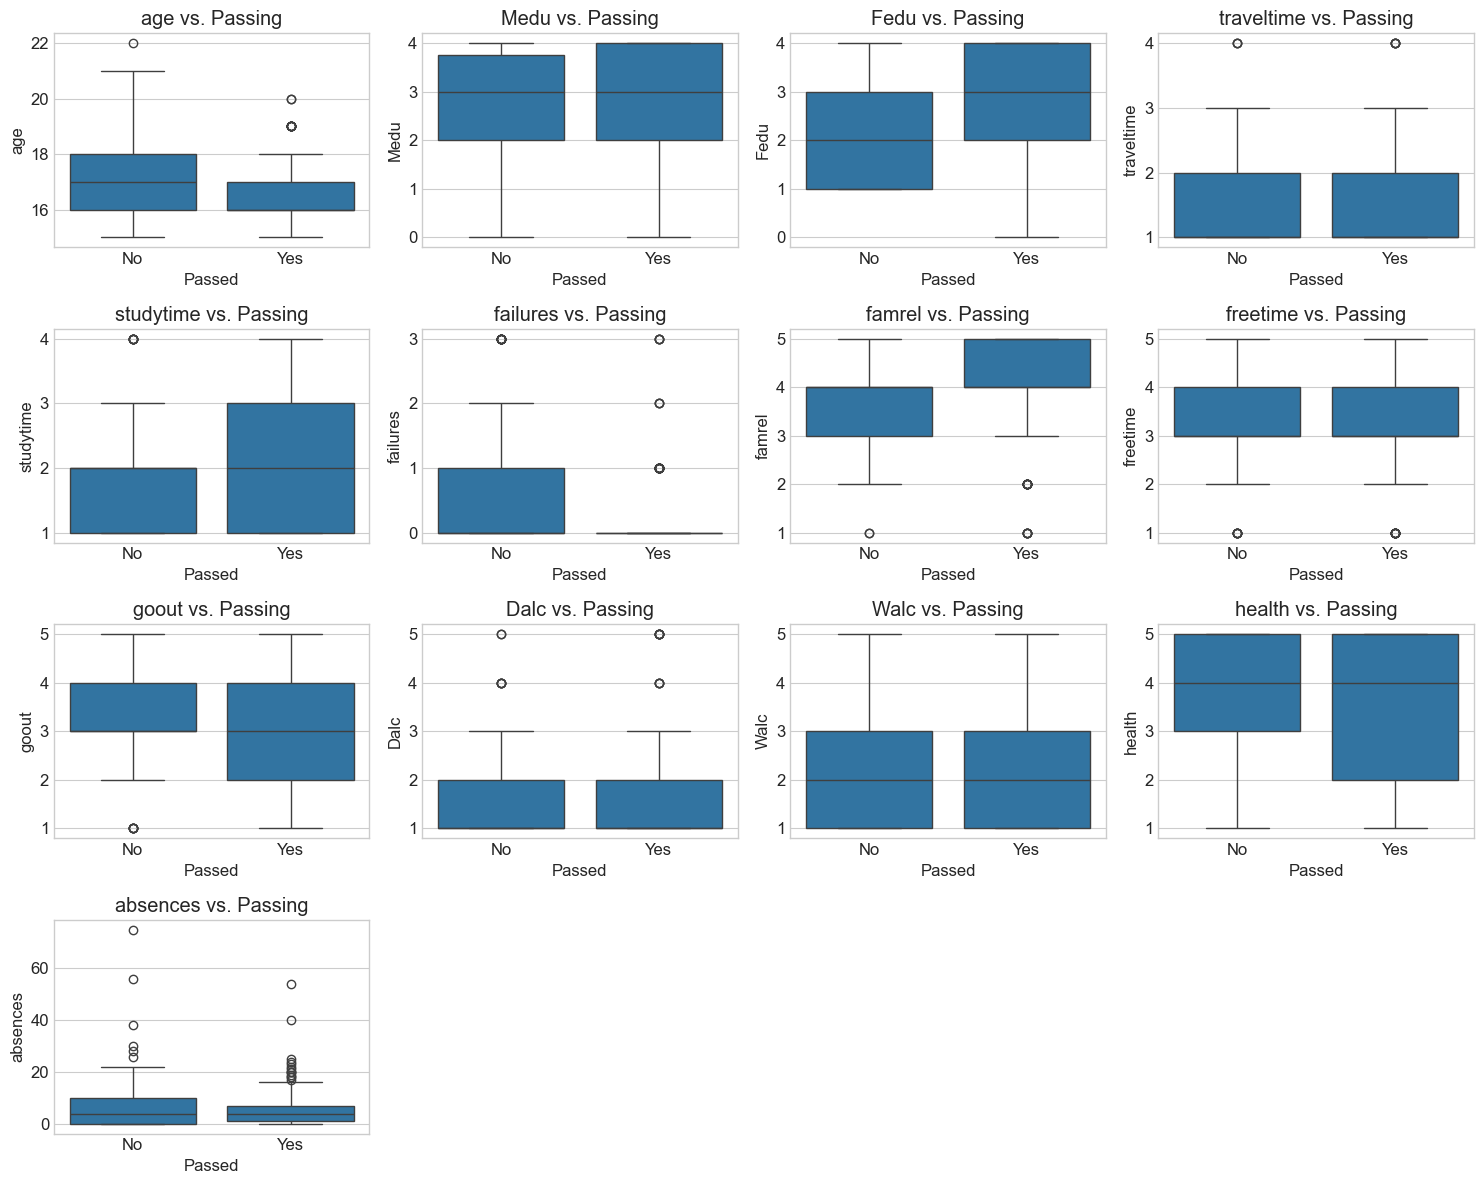

In [11]:
# Visualization of the relationship between numerical variables and the target variable
plt.figure(figsize=(15, 12))
for i, column in enumerate(numerical_columns):
    if column != 'passed':  # Exclude the target variable from visualization
        plt.subplot(4, 4, i+1)
        sns.boxplot(x='passed', y=column, data=df)
        plt.title(f'{column} vs. Passing')
        plt.xlabel('Passed')
        plt.ylabel(column)
        plt.xticks([0, 1], ['No', 'Yes'])
        plt.tight_layout()
plt.show()

The boxplots show the relationship between numerical variables and the target variable 'passed'. We can observe that some variables, such as 'failures', 'absences', seem to have a stronger relationship with passing. For example, students who passed tend to have fewer previous failures and fewer absences.
We can also observe that there aren't many outliers in the data set, the only ones worth considering are in the absences variable, such as the one student that has 75 failures, but since only 5 of these outliers were extreme, we didn't think it was affecting the study enough to be worrisome.

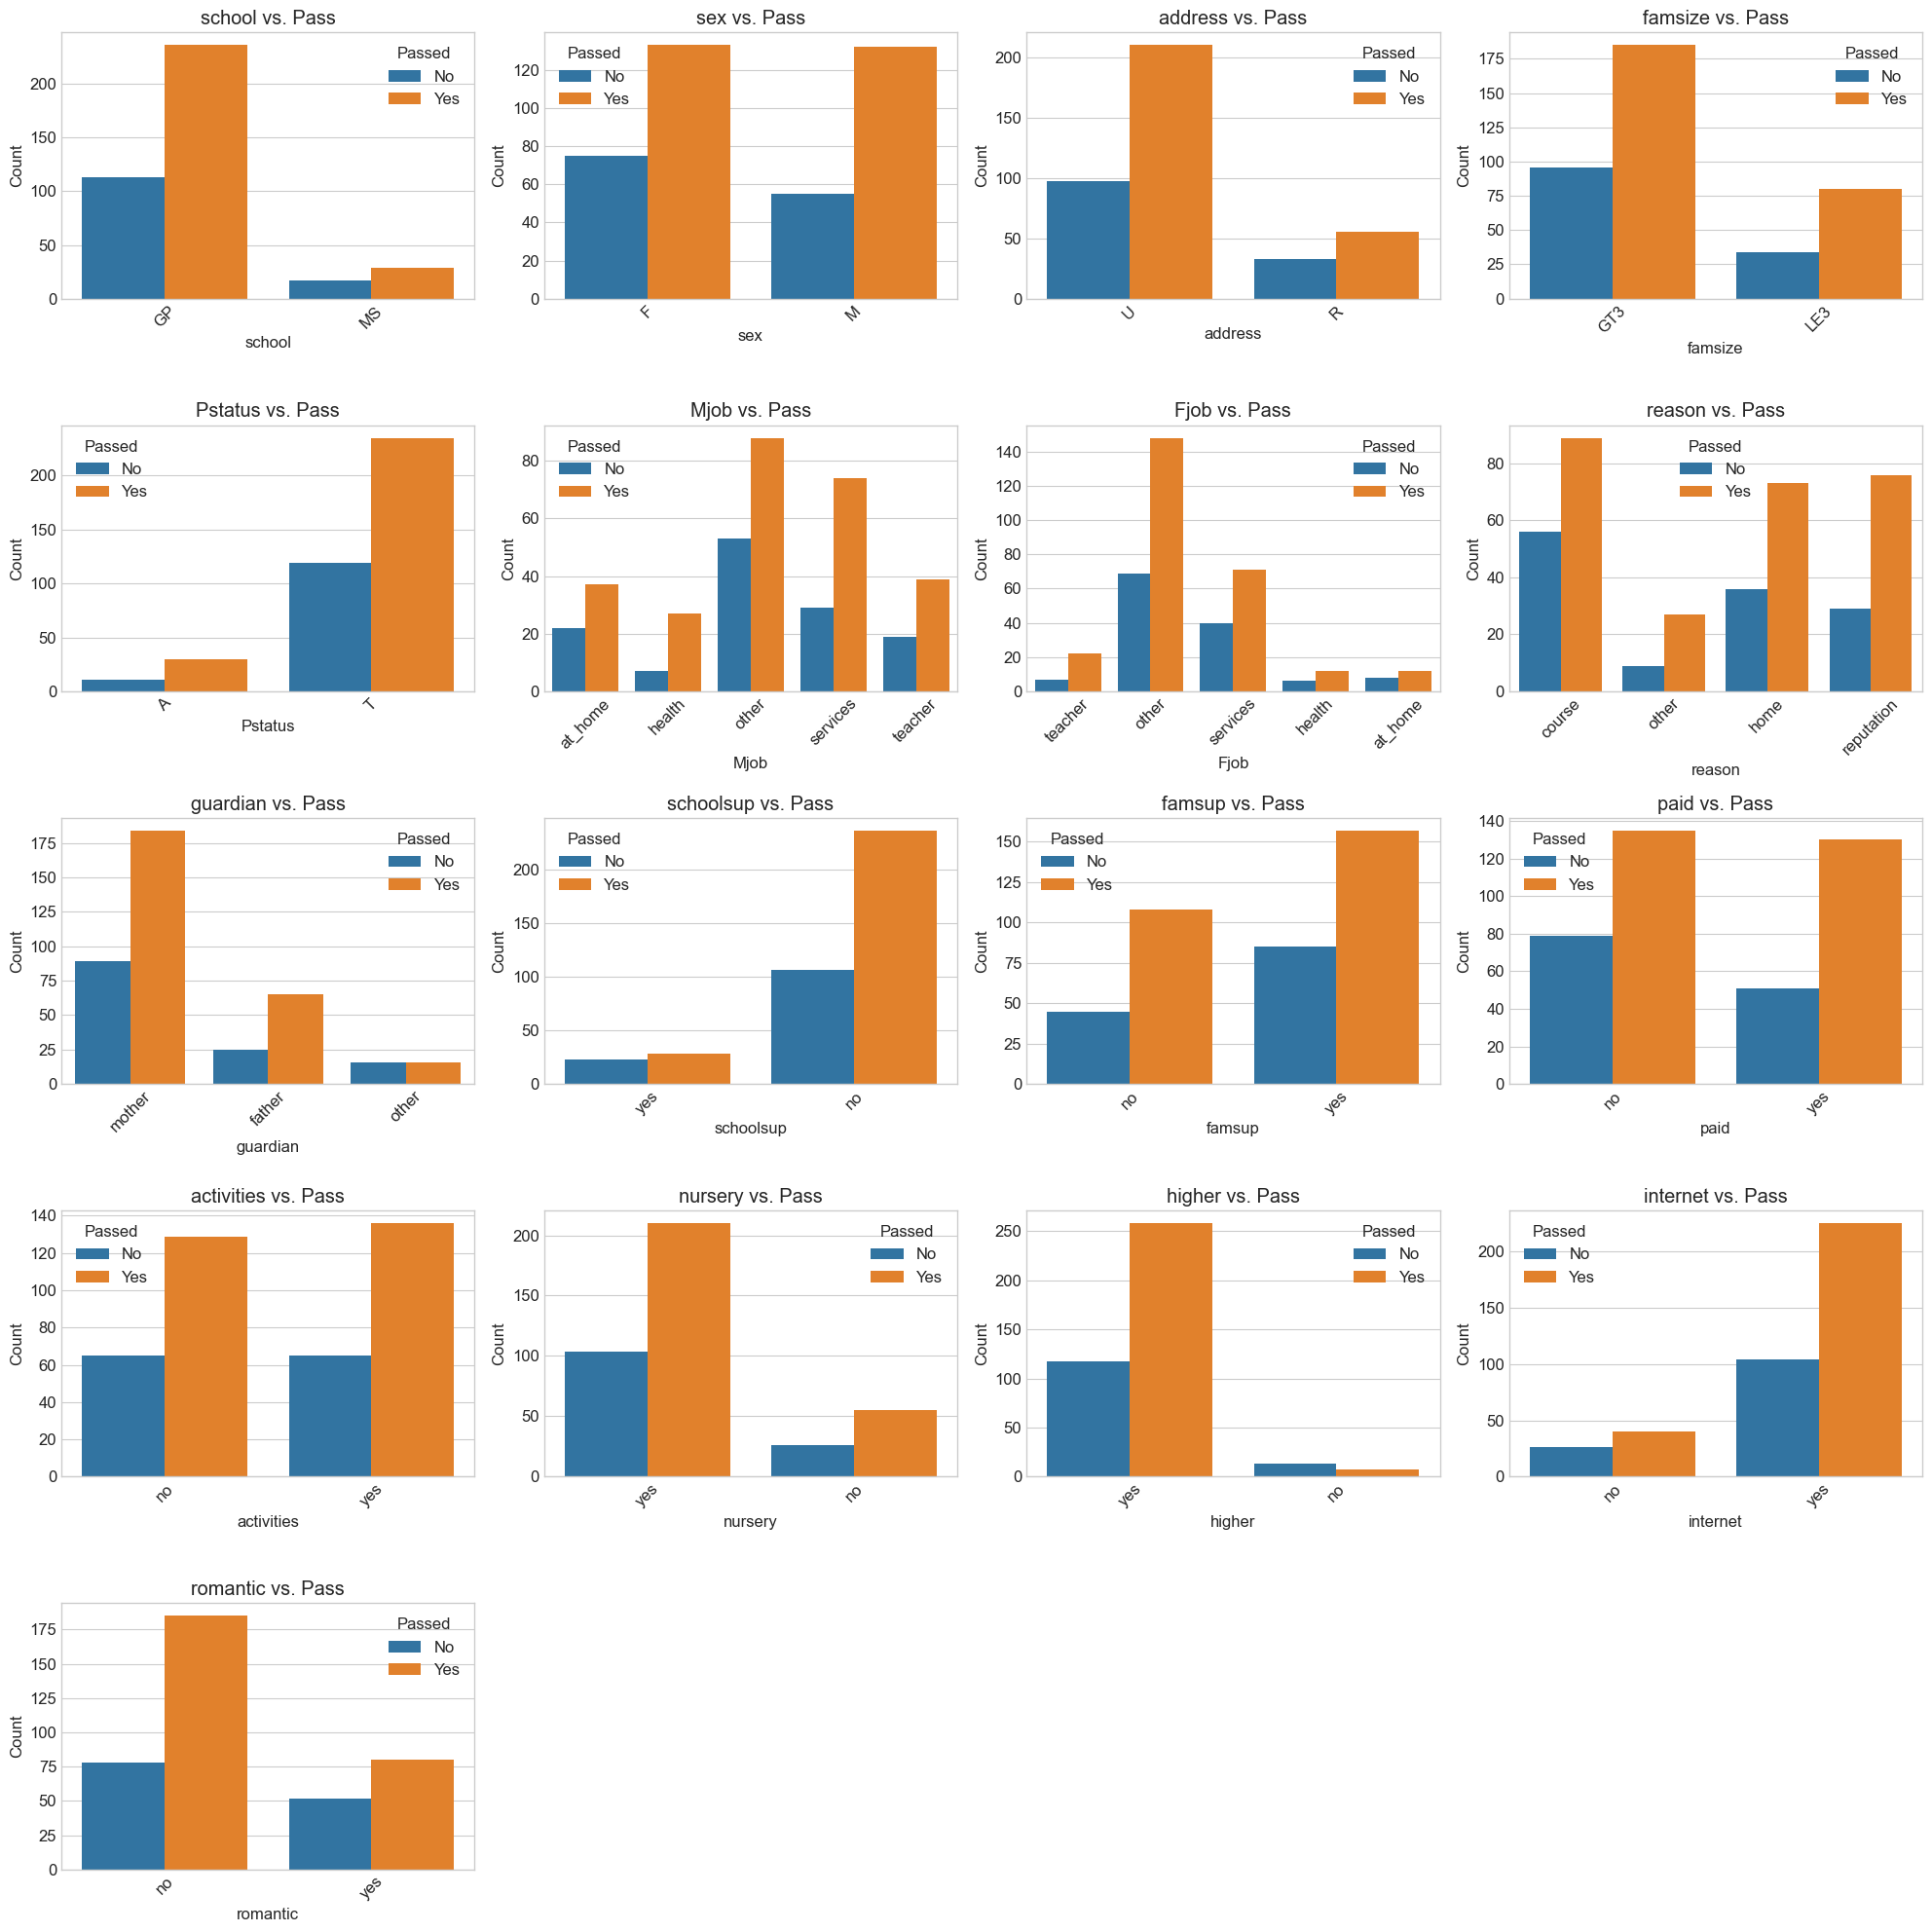

In [12]:
import math

# List of categorical columns, excluding 'passed'
plot_columns = [col for col in categorical_columns if col != 'passed']
n_plots = len(plot_columns)

# Define number of columns and rows for the subplots
n_cols = 4
n_rows = math.ceil(n_plots / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, column in enumerate(plot_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(x=column, hue='passed', data=df)
    plt.title(f'{column} vs. Pass')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Passed', labels=['No', 'Yes'])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


The bar charts show the relationship between categorical variables and the target variable 'passed'. We can observe that some variables, such as adress, reason, schoolsup, famsup, paid, higher, internet and romantic have a discrepancy between passing or not. For example, students who wish to pursue higher education ('higher' = 'yes') have a much higher passing rate than those who do not. Same thing happens for students who have internet access at home. We can also observe that students with extra educational support have a lower approval rate of about 50%, whereas students that don't have it have a much higher approval rate (about 75%). These are just some examples, but there are many others we could mention, especially those listed above.

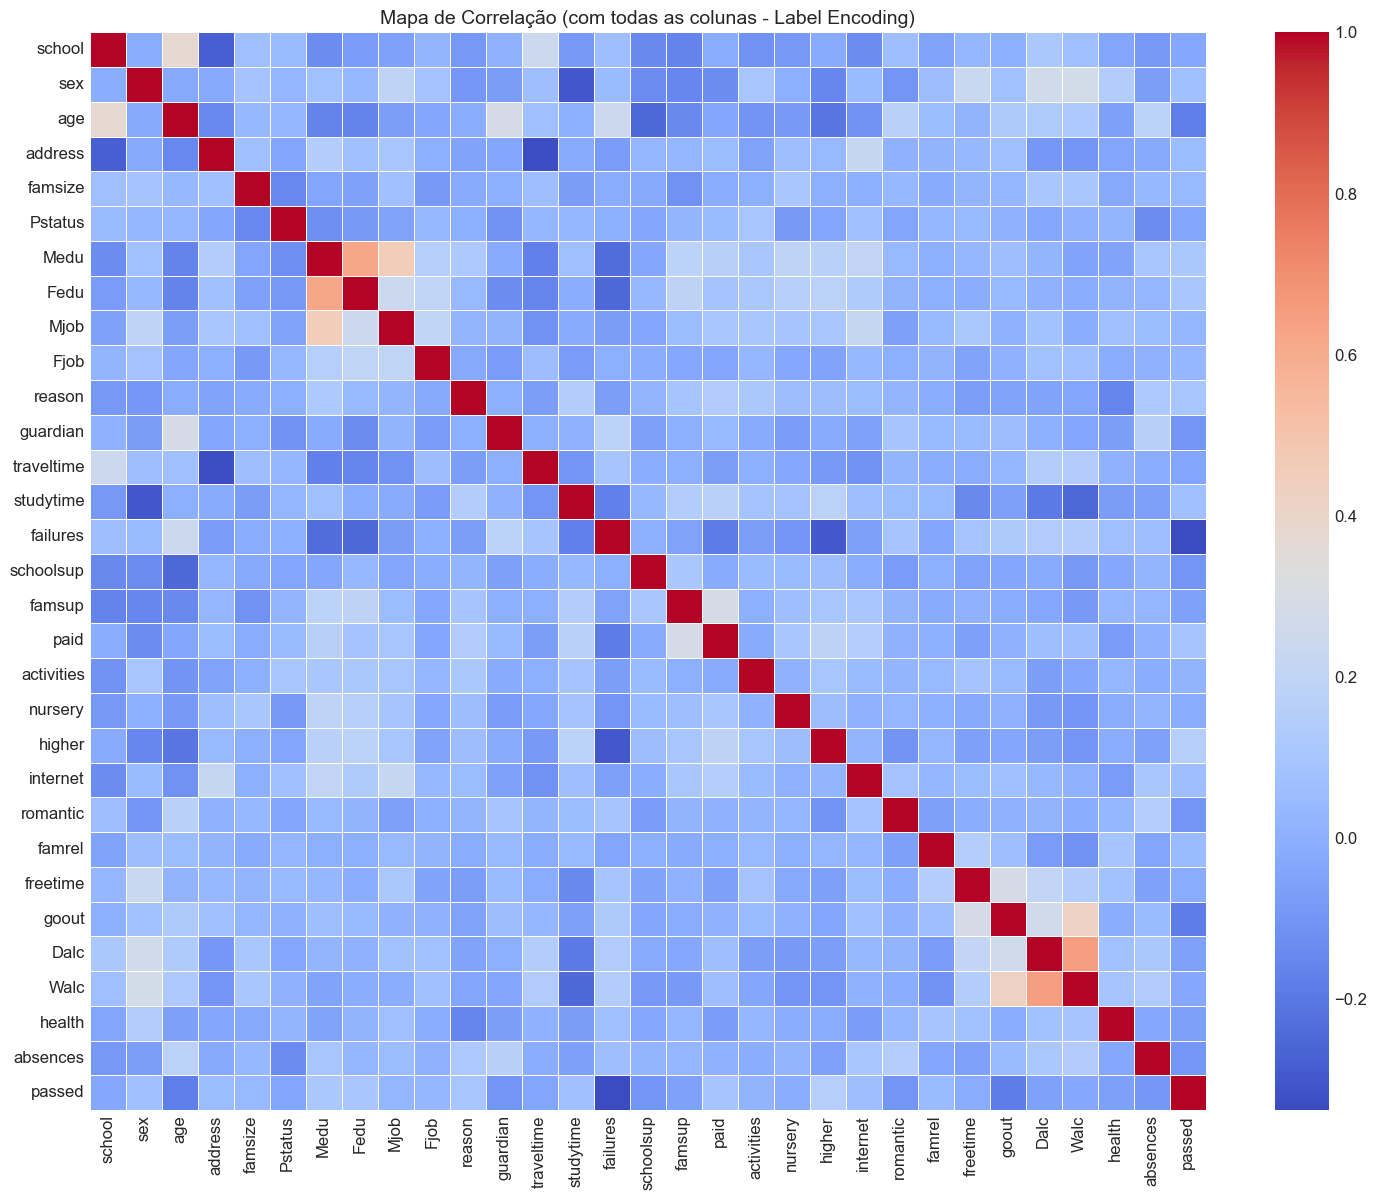

In [13]:
df_temp = df.copy()

# Aplicar Label Encoding temporário às colunas categóricas
label_encoder = LabelEncoder()
for col in df_temp.select_dtypes(include='object').columns:
    df_temp[col] = label_encoder.fit_transform(df_temp[col])

# Calcular a matriz de correlação
corr_matrix = df_temp.corr()

# Plotar o heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Mapa de Correlação (com todas as colunas - Label Encoding)", fontsize=14)
plt.show()

The correlation matrix shows the correlations between numerical variables. We can observe that some variables have moderate to strong correlations with each other. For example, 'Dalc' (alcohol consumption during the week) and 'Walc' (alcohol consumption during the weekend) have a strong positive correlation, which is expected. Additionally, 'Medu' (mother's education level) and 'Fedu' (father's education level) also have a moderate positive correlation, suggesting that parents tend to have similar education levels.

Regarding the target variable 'passed', we can observe that 'failures' (number of previous failures) has the strongest negative correlation, suggesting that students with more previous failures are less likely to pass.

## Data Preprocessing

We will perform data preprocessing to prepare the data for modeling. We started by encoding categorical variables. We also tried normalizing the numerical data but it was making our model accuracy worse so we decided not to implement it in our work.

In [14]:
# Separate features and target
X = df.drop('passed', axis=1)
y = df['passed']

# Encode target
le = LabelEncoder()
y = le.fit_transform(y)

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create empty DataFrame to collect transformed columns for the entire dataset
X_processed = pd.DataFrame(index=X.index)

# Apply transformation to each column in original order
for col in X.columns:
    if col in numerical_columns:
        X_processed[col] = X[col]
    elif col in categorical_columns:
        encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
        X_processed[col] = encoder.fit_transform(X[[col]]).ravel()

# Now all features are numerical
print("First 5 rows of the processed dataset (all numeric):")
print(X_processed.head())


First 5 rows of the processed dataset (all numeric):
   school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0     0.0  0.0   18      1.0      0.0      0.0     4     4   0.0   4.0  ...   
1     0.0  0.0   17      1.0      0.0      1.0     1     1   0.0   2.0  ...   
2     0.0  0.0   15      1.0      1.0      1.0     1     1   0.0   2.0  ...   
3     0.0  0.0   15      1.0      0.0      1.0     4     2   1.0   3.0  ...   
4     0.0  0.0   16      1.0      0.0      1.0     3     3   2.0   2.0  ...   

   higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  health  \
0     1.0       0.0       0.0       4         3      4     1     1       3   
1     1.0       1.0       0.0       5         3      3     1     1       3   
2     1.0       1.0       0.0       4         3      2     2     3       3   
3     1.0       1.0       1.0       3         2      2     1     1       5   
4     1.0       0.0       0.0       4         3      2     1     2       5   

   

Categorical variables were encoded using Ordinal Encoding, which we choose instead of the one-hot encoder due to it not increasing the number of features.
After this was done, we decided to do the train and test split (80/40).

In [15]:
# Split train/test
X_train_processed, X_test_processed, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)
print("Training set shape:", X_train_processed.shape)
print("Testing set shape:", X_test_processed.shape)
print("\n")

# Checking class balance in the training set
print("Class distribution in the training set:")
print(f"Class 0 (Not passed): {sum(y_train == 0)} ({sum(y_train == 0) / len(y_train) * 100:.2f}%)")
print(f"Class 1 (Passed): {sum(y_train == 1)} ({sum(y_train == 1) / len(y_train) * 100:.2f}%)")

Training set shape: (316, 30)
Testing set shape: (79, 30)


Class distribution in the training set:
Class 0 (Not passed): 103 (32.59%)
Class 1 (Passed): 213 (67.41%)


We can observe that there is an imbalance in the classes in the training set. We tried to use the SMOTE technique and a undersampler to fix that, but it was making our accuracy worse, so we decided not to use it. 

## Modeling

We will train and evaluate different classification models to predict whether a student will pass or not.


Results for Logistic Regression:
Accuracy: 0.7595
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.44      0.56        27
           1       0.76      0.92      0.83        52

    accuracy                           0.76        79
   macro avg       0.76      0.68      0.70        79
weighted avg       0.76      0.76      0.74        79



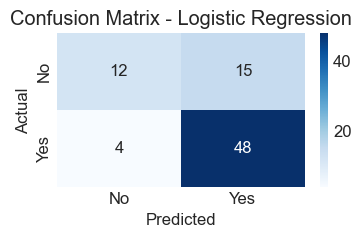


Results for Decision Tree:
Accuracy: 0.7089
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.48      0.53        27
           1       0.75      0.83      0.79        52

    accuracy                           0.71        79
   macro avg       0.67      0.65      0.66        79
weighted avg       0.70      0.71      0.70        79



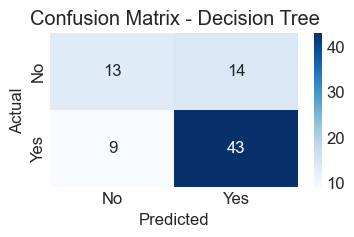


Results for Random Forest:
Accuracy: 0.7215
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.30      0.42        27
           1       0.72      0.94      0.82        52

    accuracy                           0.72        79
   macro avg       0.72      0.62      0.62        79
weighted avg       0.72      0.72      0.68        79



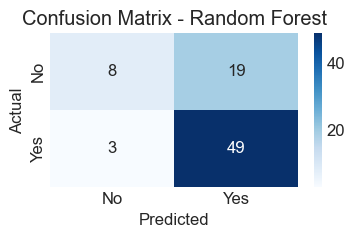

  File "c:\Users\laraq\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")



Results for KNN:
Accuracy: 0.6962
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.22      0.33        27
           1       0.70      0.94      0.80        52

    accuracy                           0.70        79
   macro avg       0.68      0.58      0.57        79
weighted avg       0.69      0.70      0.64        79



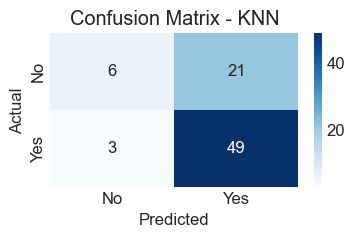

In [16]:
# Defining the models to be evaluated
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Training and evaluating each model
results = {}

for name, model in models.items():

    # Training the model
    model.fit(X_train_processed, y_train)
    
    # Predictions on the test set
    y_pred = model.predict(X_test_processed)
    
    # Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Storing the results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'report': report
    }
    
    # Printing the results
    print(f"\nResults for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

The results show the performance of different classification models in predicting student passing. We can observe that all models have reasonable performance, with accuracy varying between 0,6962 and 0,7595. The Logistic Regression model seems to have the best overall performance, with the highest accuracy and a good balance between precision and recall for both classes.

The confusion matrices show the number of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN) for each model. A good model should have high values on the main diagonal (TP and TN) and low values on the secondary diagonal (FP and FN).

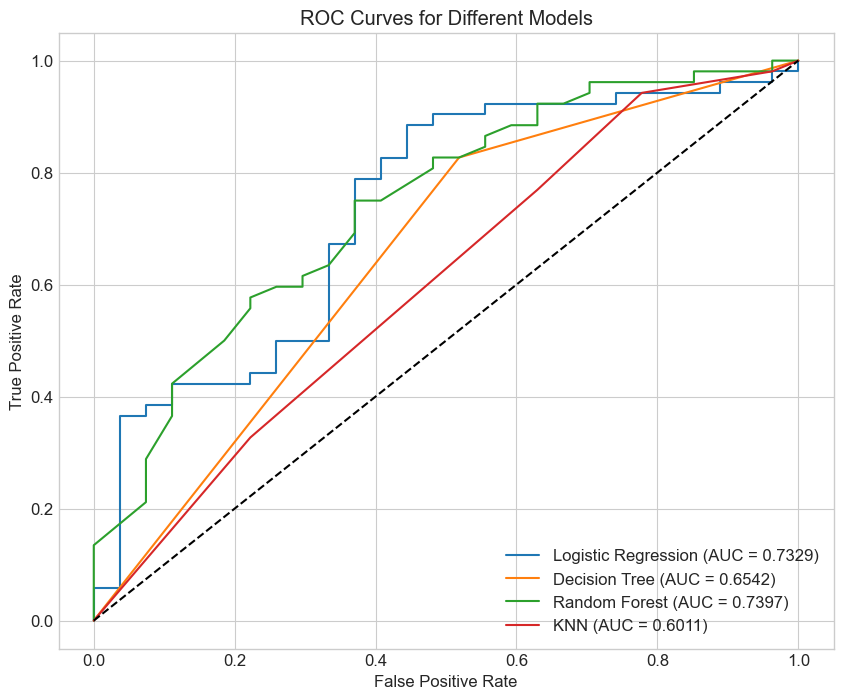

In [17]:
# Comparing models using ROC curves
plt.figure(figsize=(10, 8))

for name, result in results.items():
    model = result['model']
    y_prob = model.predict_proba(X_test_processed)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.show()

The ROC (Receiver Operating Characteristic) curves show the performance of the models at different classification thresholds. The area under the ROC curve (AUC) is a measure of the overall performance of the model, with values closer to 1 indicating better performance. We can observe that the Random Forest model has the highest AUC, followed by Logistic Regression, Decision Tree, and KNN.

So we observed that the Logistic Regression was the best model in terms of accuracy, precision and recall balance but the Random Forest model had the best AUC, closely followed by the Logistic Regression model. Because of this we found the Logistic Regression model to be the most accurate.

## Cross-validation

Now we decided to do a cross-validation, to see how a different train and test set affect the model we chose as the best working due to the past results.

Fold 1: Accuracy = 0.6456
Fold 2: Accuracy = 0.7722
Fold 3: Accuracy = 0.6835
Fold 4: Accuracy = 0.6835
Fold 5: Accuracy = 0.7215

Mean Accuracy across 5 folds: 0.7013


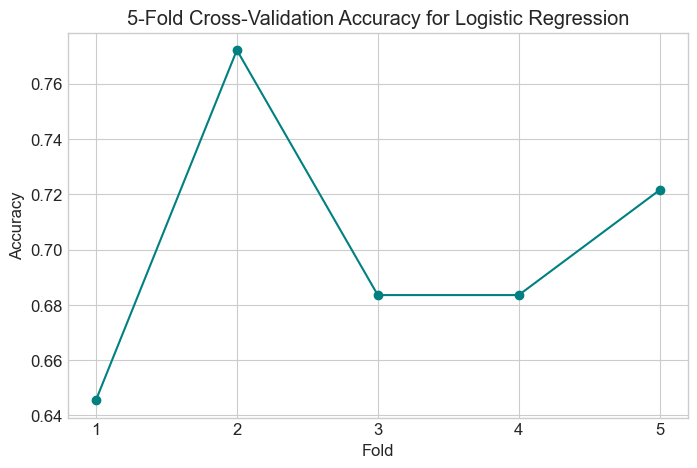

In [18]:
# Prepare stratified k-fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []

# Loop through the folds
for fold, (train_idx, test_idx) in enumerate(cv.split(X_processed, y), 1):
    X_train_cv, X_test_cv = X_processed.iloc[train_idx], X_processed.iloc[test_idx]
    y_train_cv, y_test_cv = y[train_idx], y[test_idx]

    # Initialize and train the model
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train_cv, y_train_cv)

    # Predict and evaluate
    y_pred_cv = model.predict(X_test_cv)
    acc = accuracy_score(y_test_cv, y_pred_cv)
    accuracies.append(acc)

    print(f"Fold {fold}: Accuracy = {acc:.4f}")

mean_accuracy = np.mean(accuracies)
print(f"\nMean Accuracy across 5 folds: {mean_accuracy:.4f}")

# Plotting accuracies across folds using a line plot (instead of bars)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), accuracies, marker='o', linestyle='-', color='teal')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('5-Fold Cross-Validation Accuracy for Logistic Regression')
plt.grid(True)
plt.show()

Analysing the results, we can find a pretty big difference using different training/testing sets, we can also observe that fold 2 was significantly better than the others. We think the main reason for this difference may be due to the big inbalance between the classes in the dataset (more students passing than others).

## Feature Importance Analysis

We will analyze the importance of features in the logistic regression model to understand which factors have the greatest influence on predicting student passing.

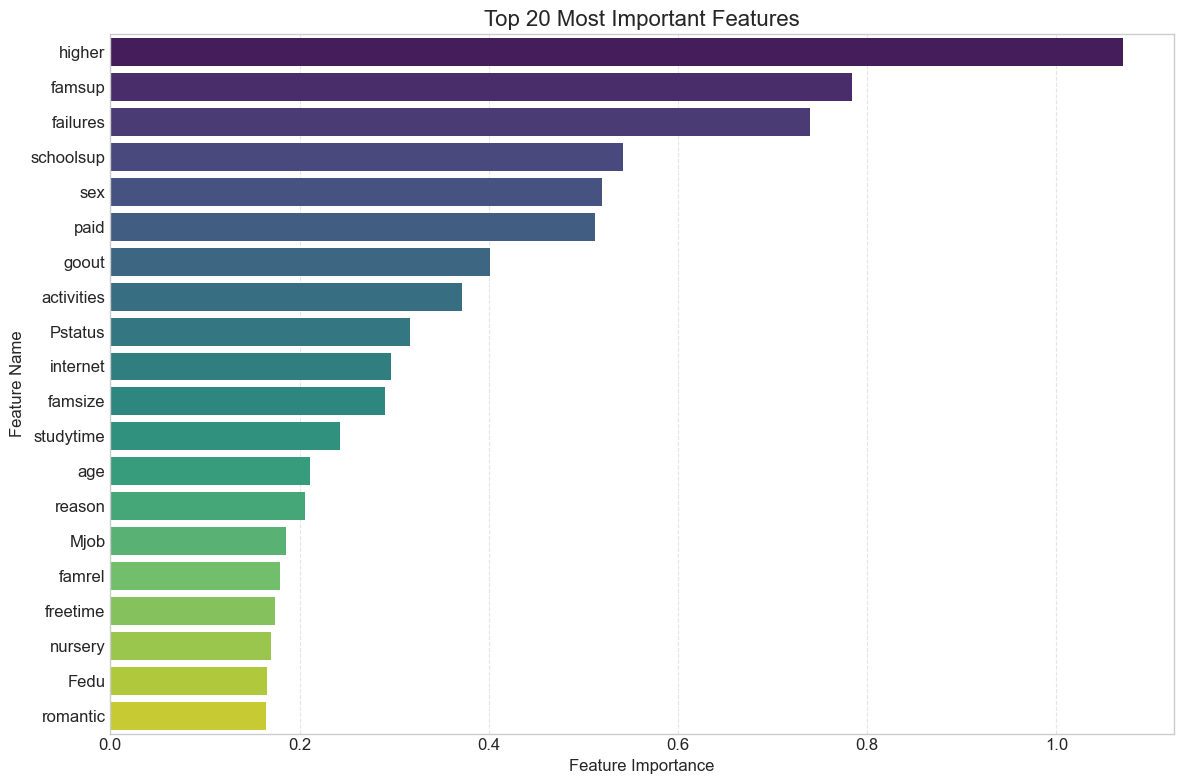

In [19]:
# Step 1: Train your model
model = LogisticRegression().fit(X_train_processed, y_train)

# Step 2: Get feature importances
importances = model.coef_[0]  # Shape should be (n_features,)
feature_names = X_train_processed.columns

# Step 4: Create DataFrame for feature importances
df_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': abs(importances)
})

# Step 5: Plot top 20
top_features_df = df_importance.nlargest(20, 'Importance')

plt.figure(figsize=(12, 8))
sns.barplot(data=top_features_df, y='Feature', x='Importance', palette='viridis')
plt.title('Top 20 Most Important Features', fontsize=16)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Feature Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


The feature importance analysis shows which factors have the greatest influence on predicting student passing. The most important features include if the student wants to take higher education, family educational support, and the number of previous failures. This suggests that these factors are the most determinant for students' academic success.

It is interesting to note that some features that we would expect to have great importance, such as absences, are not among the most important. It's also interesting that some features such as sex have such a high importance.

## Conclusions and Recommendations

In this work, we analyzed a dataset on the academic performance of secondary school students and developed classification models to predict whether a student will pass or not. Here are the main conclusions and recommendations:

### Main Conclusions

1. **Model performance**: The Logistic Regression model had the best performance, with an accuracy of 75,95% on the test set. This suggests that it is possible to predict with reasonable accuracy whether a student will pass or not based on the available characteristics.

2. **Feature importance**: The feature importance analysis showed that the most determinant factors for students' academic success include if the student wants to take higher education, family educational support, the number of previous failures and extra educational support. This can help guide educational interventions to improve students' academic performance.

### Recommendations

1. **Model improvement**: To improve the model's performance, we recommend collecting more data, especially for the minority class. In the next project we also want to experiment with more advanced techniques for class balancing and feature selection, since the ones we used in this one didn't really help our results.


### Study Limitations

1. **Sample size**: The dataset used is relatively small, with only 395 records. This may limit the generalization of the results and the accuracy of the models.

2. **Class imbalance**: There is an imbalance in the classes in the dataset, with more students passing than not passing. Although we tried using class balancing techniques, this affected the performance of the models. We think this might also be the reason why our cross-validation results varied so much.

In summary, this work provides valuable insights into the factors that influence students' academic performance and demonstrates the feasibility of using machine learning techniques to predict academic success. However, it is important to consider the limitations of the study when using the results to inform educational decisions.